In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

with open("books_1.Best_Books_Ever.csv", encoding="utf-8") as f:
    df = pd.read_csv(f)

In [27]:
df['pages'] = pd.to_numeric(df['pages'], downcast='integer', errors='coerce') #Gjør 'pages' kolonnen om til int, slik at jeg kan finne gjennomsnitt
print(int(df['pages'].mean()))

328


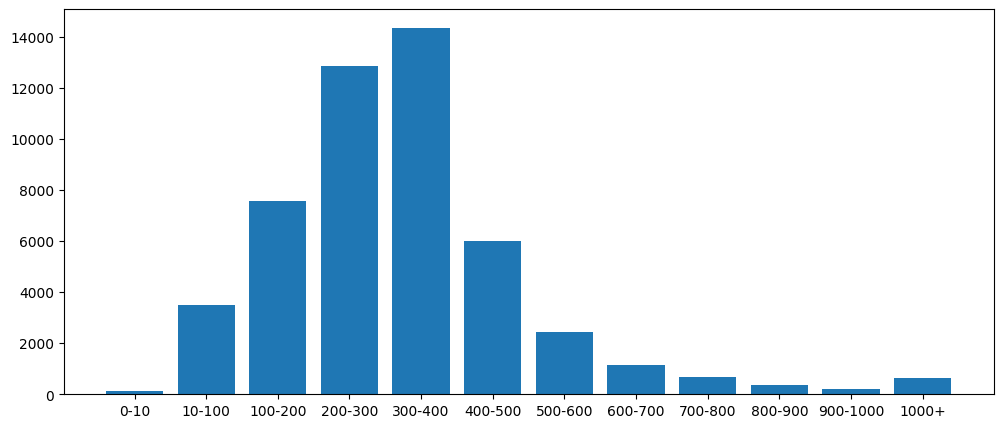

In [23]:
bins = [0, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float("inf")]
labels = ["0-10", "10-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", "800-900", "900-1000", "1000+"]

df['category'] = pd.cut(df['pages'], bins=bins, labels=labels, right=True)
page_counts = df['category'].value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(12,5))
plt.bar(labels, page_counts)
plt.show()
